# 2H ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ ΣΤΗΝ ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ
# Ονοματεπώνυμα:Θεοδοσίου Γιάννης(03115056) Κατωπόδης Παναγιώτης(03115760)

# Μερος 1ο (βήματα 1-8) προπαρασκευή


Bημα 1ο:
Παρατηρούμε μεγαλύτερες τιμές του pitch για τα ηχητικά της γυναίκας και ειναι πιο εύκολο να ξεχωρίσουμε τα φωνήεντα μεταξύ τους.Επιπλέον διαρκόυν περισσότερο χρόνο απο τα αντρικά.



Βήμα 2ο:
Παρακάτω παρουσιάζουμε την ζητούμενη συνάρτηση που δέχεται ως όρισμα το path του φακέλου των recordings και επιστρέφει τους 3 πίνακες με τα συνολικά wavs τους εκφωνητές κάθως και το ψηφίο που εκφωνουν

In [39]:
import os
from os import listdir
from os.path import isfile, join
import librosa

def data_parser(mypath):
    files = os.listdir(mypath)
    print(len(files))
    wavs=[]
    speaker=[]
    digits=[]

    digits_dict={'one': 1,'two': 2,'three': 3,'four': 4,'five':5,'six':6,'seven':7,'eight':8,'nine' : 9}
  
    speak_num=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
    for f in files:
        path=mypath + '/' + f
        wavs.append(librosa.load(path,sr=16000))
        for s in speak_num:
            if s in f:
                speaker.append(s)
        for d in digits_dict:
            if d in f:
                digits.append(digits_dict[d])


    return wavs,speaker,digits

w,speaker,digits=data_parser(r"\Users\Giannis\Downloads\pr_lab2_2019-20_data (1)\pr_lab2_2019-20_data\digits")


133


Βήμα 3:

Εξάγουμε με το librosa 13 Mel-Frequency Cepstral Coefficients για κάθε αρχείο ήχου. Χρησιμοποιήουμε οπως ζητείται μήκος παραθύρου 25 ms και βήμα 10 ms και ύστερα υπολογίζουμε την πρώτη και δεύτερη τοπική παράγωγο των χαρακτηριστικών (deltas και delta-deltas)

In [40]:
#bhma3
import numpy as np
mel=[[[]]]                    #edw kratame ta mfccs
n_fft=int(16000*0.025)
hop_len=n_fft//2

for i in range(len(w)):
    mel.insert(i,librosa.feature.mfcc(y=w[i][0], sr=w[i][1],n_mfcc=13,n_fft=n_fft,hop_length=hop_len))
del mel[133]


delta=[[[]]]
delta_delta=[[[]]]
for i in range(len(w)):
    delta.insert(i,librosa.feature.delta(mel[i],order=1))

    delta_delta.insert(i,librosa.feature.delta(mel[i],order=2))

del delta[133]
del delta_delta[133]

Bήμα 4:

Εδώ αναπαραστηστούμε τα ιστογράμματα του 1ου και του 2ου MFCC των ψηφίων n1=5 και n2=6 για όλες τους τις
εκφωνήσεις και βλέπουμε οτι οι τιμές έχουν την τάση να συγκεντρώνονται γύρω απο μια συγκεκριμένη τιμή.
Υστερα για 2 εκφωνήσεις των n1 και n2 από 2 διαφορετικούς ομιλητές εξάγουμε τα Mel Filterbank
(filMFSCs),τα χαρακτηριστικά που εξάγονται δηλαδή αφού εφαρμοστεί η συστοιχία φίλτρων της κλίμακας Mel
πάνω στο φάσμα του σήματος φωνής αλλά τώρα χωρίς να εφαρμοστεί στο τέλος ο μετασχηματισμός DCT και αναπαριστούμε γραφικά τη συσχέτιση των MFSCs για την κάθε εκφώνηση.Προτιμάμε το mfccs γτ οπώς βλεπουμε απο τους πινκαες αυτοσυσχέτισης τα μη διαγώνια στοιχεία είναι μικρά η μηδενικά



In [41]:
#bhma 4
n1=5
n2=6
fives=[[[]]]
sixes=[[[]]]
fives_mel=[[[]]]
sixes_mel=[[[]]]

for i,d in enumerate(digits):
    if (d==n1):
        fives.append(mel[i])
        fives_mel.append(librosa.feature.melspectrogram(y=w[i][0], sr=w[i][1],n_fft=n_fft,hop_length=hop_len,n_mels=13))
    if (d==n2):
        sixes.append(mel[i])
        sixes_mel.append(librosa.feature.melspectrogram(y=w[i][0], sr=w[i][1],n_fft=n_fft,hop_length=hop_len,n_mels=13))

del fives[0]
del sixes[0]

del fives_mel[0]
del sixes_mel[0]


first_co_five=[[]]
second_co_five=[[]]
first_co_five_mel=[[]]
second_co_five_mel=[[]]
for f,f2 in zip(fives,fives_mel):
    first_co_five.append(f[0][:])
    second_co_five.append(f[1][:])
    first_co_five_mel.append(f2[0][:])
    second_co_five_mel.append(f2[1][:])


del first_co_five[0]
del second_co_five[0]
del first_co_five_mel[0]
del second_co_five_mel[0]



first_co_six=[[]]
second_co_six=[[]]
first_co_six_mel=[[]]
second_co_six_mel=[[]]
for s,s2 in zip(sixes,sixes_mel):
    first_co_six.append(s[0][:])
    second_co_six.append(s[1][:])
    first_co_six_mel.append(f[0][:])
    second_co_six_mel.append(f[1][:])


del first_co_six[0]
del second_co_six[0]
del first_co_six_mel[0]
del second_co_six_mel[0]

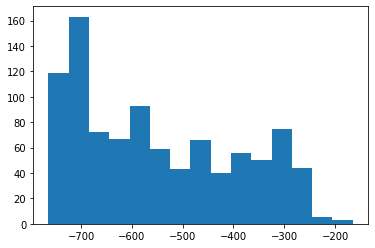

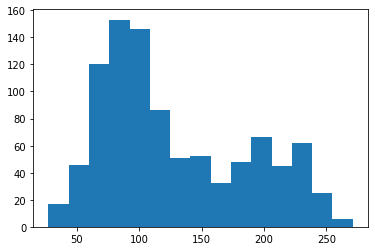

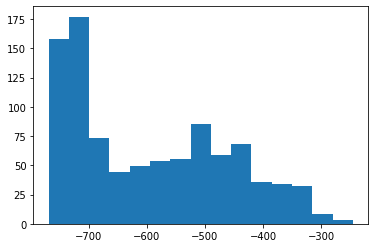

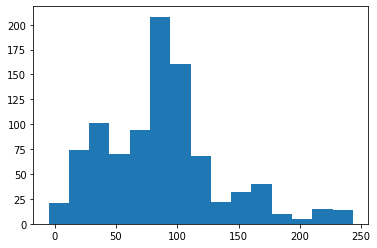

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
d1=pd.DataFrame(first_co_five[0])
d2=pd.DataFrame(second_co_five[0])
d3=pd.DataFrame(first_co_six[0])
d4=pd.DataFrame(second_co_six[0])
#total_first_five=first_co_five[0][:]
#total_second_five= second_co_five[0][:]
#total_first_six=first_co_six[0][:]
#total_second_six=second_co_six[0][:]
total_first_five=d1.T
total_second_five=d2.T
total_first_six=d3.T
total_second_six=d4.T
for i in range(1,len(first_co_five)):
    k1=pd.DataFrame(first_co_five[i])
    k2=pd.DataFrame(second_co_five[i])
    total_first_five=np.concatenate((total_first_five,k1.T),axis=1)
    total_second_five=np.concatenate((total_second_five,k2.T),axis=1)
for i in range(1,len(first_co_six)):
    k3=pd.DataFrame(first_co_six[i])
    k4=pd.DataFrame(second_co_six[i])
    total_first_six=np.concatenate((total_first_six,k3.T),axis=1)
    total_second_six=np.concatenate((total_second_six,k4.T),axis=1)
    
total_first_five=total_first_five[0]
total_second_five=total_second_five[0]
total_first_six=total_first_six[0]
total_second_six=total_second_six[0]

TOTAL=[total_first_five,total_second_five,total_first_six,total_second_six]

for i,k in enumerate(TOTAL):
    fig=plt.figure(i)
    plt.hist(k,bins=15)
plt.show()

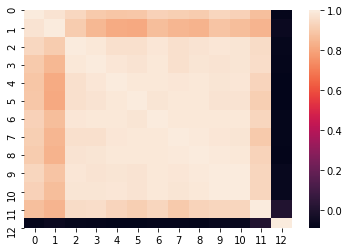

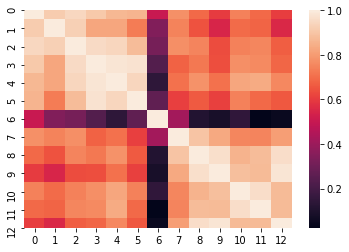

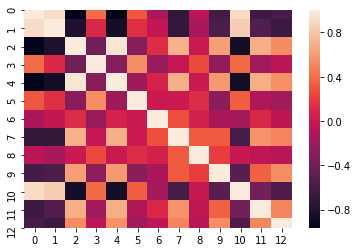

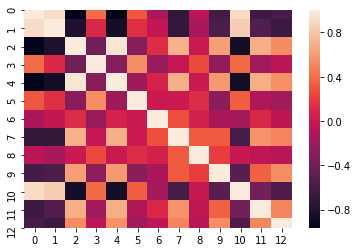

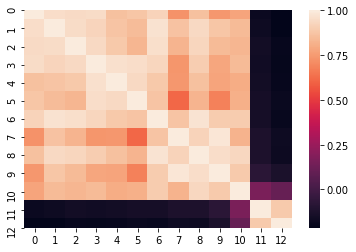

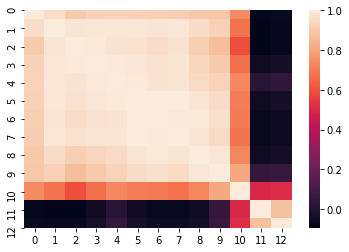

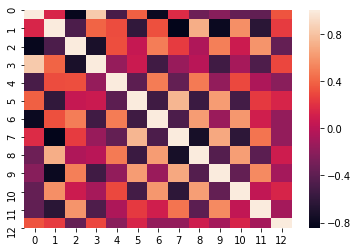

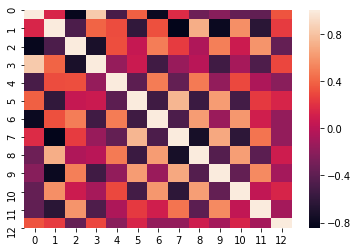

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
d1= pd.DataFrame(fives_mel[0])
d2= pd.DataFrame(fives_mel[1])
d3= pd.DataFrame(fives[0])
d4= pd.DataFrame(fives[0])

d5= pd.DataFrame(sixes_mel[0])
d6= pd.DataFrame(sixes_mel[1])
d7= pd.DataFrame(sixes[0])
d8= pd.DataFrame(sixes[0])

c1=(d1.T).corr()
c2=(d2.T).corr()
c3=(d3.T).corr()
c4=(d4.T).corr()
c5=(d5.T).corr()
c6=(d6.T).corr()
c7=(d7.T).corr()
c8=(d8.T).corr()

CO=[c1,c2,c3,c4,c5,c6,c7,c8]

for i,k in enumerate(CO):
    fig=plt.figure(i)
    #plt.plot(k)
    sns.heatmap(k)
plt.show()

Βημα 5:

Για την αναγνώριση των ψηφίων είναι απαραίτητη η εξαγωγή ενός μοναδικού διανύσματος
χαρακτηριστικών για κάθε εκφώνηση.
Ενώνουμε λοιπόν τα mfccs – deltas – delta-deltas και έπειτα για κάθε εκφώνηση δημιουργούμε ένα διάνυσμα παίρνοντας
τη μέση τιμή και την τυπική απόκλιση κάθε χαρακτηριστικού για όλα τα παράθυρα της εκφώνησης.
Τελος δείχουμε με scatter plot τις 2 πρώτες διαστάσεις των διανυσμάτων αυτών με διαφορετικό
χρώμα και σύμβολο για κάθε ψηφίο.Παρατηρουμε οτι αρκετά δειγματα παραουσιάζουν επικαλύψεις σε αυτες τις δύο διαστάσεις




In [44]:
#bhma 5a
import math
total=[]

for i in range(len(mel)):
  a=np.concatenate((mel[i],delta[i]), axis=0)                  #enwnoume ta mfccs delta kai delta-delta
  b=np.concatenate((a,delta_delta[i]), axis=0)
  total.append(b)

total_mean=np.zeros((len(total),len(total[1])))
for i in range(len(total)):
    for j in range(len(total[1])):
      total_mean[i][j]=total[i][j].mean()                 #pairnoume th mesh timi gia ola ta parathura tis ekfwnisis



#typikh apoklish
total_var=np.zeros((len(total),len(total[1])))
for i in range(len(total)):
      for j in range(len(total[1])):
        total_var[i][j]=np.var(total[i][j])
        total_var[i][j]=math.sqrt(total_var[i][j])

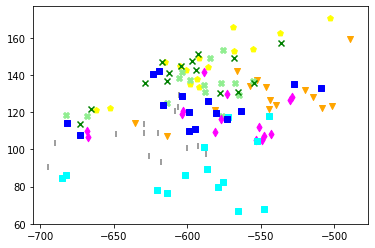

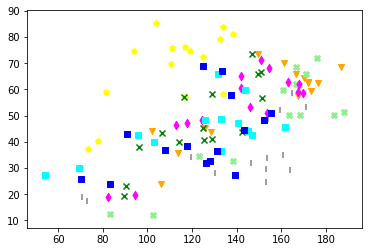

In [45]:
#bhma 5b
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig1=plt.figure(1)
dict_c={0:'red',1:'green',2:'blue',3:'black',4:'yellow',5:'orange',6:'cyan',7:'magenta',8:'gray',9:'lightgreen'}
dict_mark={0:'o',1:'x',2:'s',3:'',4:'p',5:'v',6:',',7:'d',8:'|',9:'X'}
for i in range(len(total_mean)):
  x_t= total_mean[i][0]
  y_t= total_mean[i][1]
  c=dict_c[digits[i]]
  m=dict_mark[digits[i]]
  plt.scatter(x_t,y_t,c=c,marker=m)
plt.show()

fig2=plt.figure(2)
for i in range(len(total_var)):
  x_t= total_var[i][0]
  y_t= total_var[i][1]
  c=dict_c[digits[i]]
  m=dict_mark[digits[i]]
  plt.scatter(x_t,y_t,c=c,marker=m)
plt.show()

Βήμα 6

Για απεικόνιση πολυδιάστατων διανυσμάτων είναι αρκετά βοηθητική η μείωση των διαστάσεών τους με
Principal Component Analysis. Μειώνουμε λοιπόν σε 2 τις διαστάσεις των διανυσμάτων του προηγούμενου
βήματος με PCA και δημιουργούμε παλι το ίδιο scatter plot. 
Το ίδιο επαναλαμβάνουμε και για τρείς διαστάσεις
και η πληροφορία που μας δίνουν για τα principal components είναι κεντράρονται γύρω απο το μηδέν 
οπότε αυτό καθιστά τη μείωση διαστάσεων επιτυχής


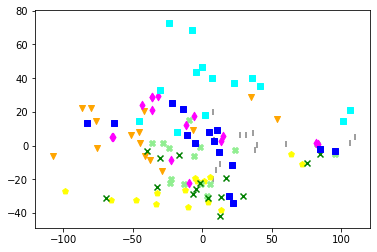

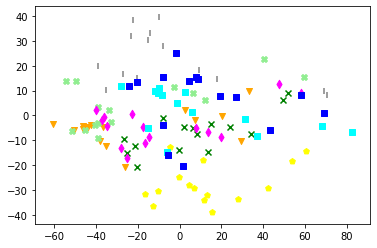

In [46]:
#bhma 6 

from sklearn.decomposition import PCA
fig3=plt.figure(3)
pca=PCA(n_components=2)
r=pca.fit_transform(total_mean)
for i in range(len(total_mean)):
  c=dict_c[digits[i]]
  m=dict_mark[digits[i]]
  plt.scatter(r[i][0],r[i][1],c=c,marker=m)

plt.show()

fig4=plt.figure(4)
r=pca.fit_transform(total_var)
for i in range(len(total_var)):
  c=dict_c[digits[i]]
  m=dict_mark[digits[i]]
  plt.scatter(r[i][0],r[i][1],c=c,marker=m)

plt.show()

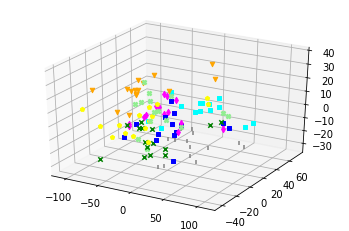

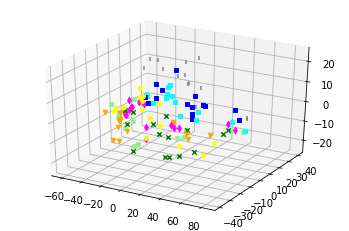

In [47]:
from mpl_toolkits.mplot3d import Axes3D
pca3=PCA(n_components=3)
fig5=plt.figure(5)
r=pca3.fit_transform(total_mean)
ax=fig5.add_subplot(111,projection='3d')
for i in range(len(total_mean)):
  c=dict_c[digits[i]]
  m=dict_mark[digits[i]]
  ax.scatter(r[i][0],r[i][1],r[i][2],c=c,marker=m)
plt.show()

fig6=plt.figure(6)
r=pca3.fit_transform(total_var)
ax=fig6.add_subplot(111,projection='3d')
for i in range(len(total_var)):
  c=dict_c[digits[i]]
  m=dict_mark[digits[i]]
  ax.scatter(r[i][0],r[i][1],r[i][2],c=c,marker=m)
plt.show()

Βήμα 7

Χωρίζουμε τα δεδομένα οπως ζητείται σε train-test με αναλογία 70%-30% και πραγματοποιούμε αρχικα μια
ταξινόμηση με χρήση του  naive Bayesian ταξινομητη του Sklearn που δεν παρουσιάζει ιδιαίτερη ακρίβεια

Ύστερα χρησιμοποιούμε τους εξής τρεις έτοιμους υλοποιημένους ταξινομητές

-> ΚΝΝ χρισημοποιώντας αριθμο γειτόνων απο 1 μεχρι 3

-> SVC with poly kernel

->SVC with rbf kernel

και κάτω απο το αντιστοιχο κελί φαίνεται το ποσοστό επιτυχίας τους στο test set
Παρατηρούμε γενικά χαμηλά ποσοστά. Για την αδυναμία αυτη που παρουσιάζουν οι ταξινομητες στην αναγνωριση φωνής ασχολούμαστε στο επόμενο μέρος της εργασίας με κρυφά μαρκοβιανά μοντέλα και νευρωνικά δίκτυα



In [48]:
#bhma 7 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(total_mean, digits, test_size=0.3,random_state=42)


In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_p=gnb.predict(x_test)
print("Accuracy bayes:",metrics.accuracy_score(y_test, y_p))

Accuracy bayes: 0.275


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,4)
scoresKNN={}
scoresKNN_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_p=knn.predict(x_test)
    scoresKNN[k]=metrics.accuracy_score(y_test,y_p)
    scoresKNN_list.append(scoresKNN[k])
print('knn for neighbor 1-3 scores: ',scoresKNN_list)

knn for neighbor 1-3 scores:  [0.625, 0.425, 0.5]


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
svmG=SVC(kernel='poly',degree=9,gamma='auto')
svmG.fit(x_train,y_train)
svmGpred=svmG.predict(x_test)
print('svc with poly kernel accuracy',accuracy_score(svmGpred,y_test))

svc with poly kernel accuracy 0.675


In [52]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
svmG=SVC(kernel='rbf',degree=9,gamma='auto')
svmG.fit(x_train,y_train)
svmGpred=svmG.predict(x_test)
print('svc with rbf kernel accuracy',accuracy_score(svmGpred,y_test))

svc with rbf kernel accuracy 0.05


Βήμα 8

Το μέρος αύτο είναι ανεξαρτητο απο τα προηγούμενα ερωτήματα.
Αφου κατασκευάσουμε τις ζητούμενες ακολουθίες του ημιτόνου εκπαιδεόυμε ενα αναδρομικο νευρωνικό να αντιστοιχιζει ακολουθιές ημιτόνου σε συνημιτόνου. Ύστερα τσεκάρουμε την επιτυχία της εκπαίδευσης συγκρινόντας την αληθινή ακολουθια του συνημιτόνου με αυτή του νευρωνικού για κάποια τυχαία παραδείγματα. Στηριχτήκαμε στην υλοποίηση που υπάρχει στο παρακάτω λινκ:
https://rkkuang.wordpress.com/2018/06/11/rnn-regression/


Η αδυναμία του rnn cell να μαθει Long term dependencies αντιμετωπίζεται αποτελεσματικά απο τα LSTM κυτταρα τα οποία διαθέτουν ειδικό μηχανισμό διατήρησης των απαραίτητων πληροφοριών καθώς και αποβολή αυτών που δεν χρείαζονται.

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

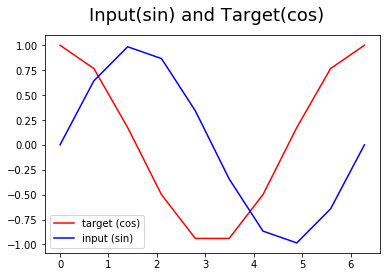

In [54]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
TIME_STEP = 10 
INPUT_SIZE = 1 
LR = 0.02 
steps = np.linspace(0, np.pi*2, 10, dtype=np.float32)
x_np = np.sin(steps) 
y_np = np.cos(steps)
plt.figure(1)
plt.suptitle('Input(sin) and Target(cos)',fontsize='18')
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [55]:
h_size = 36 #number of rnn hidden units
#we edefine the rnn class with the appropriate initializatin and forward function
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=INPUT_SIZE,hidden_size=h_size, num_layers=1, batch_first=True,)
        self.out = nn.Linear(h_size, 1)

    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = [] # save all predictions
        for time_step in range(r_out.size(1)): # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 36, batch_first=True)
  (out): Linear(in_features=36, out_features=1, bias=True)
)


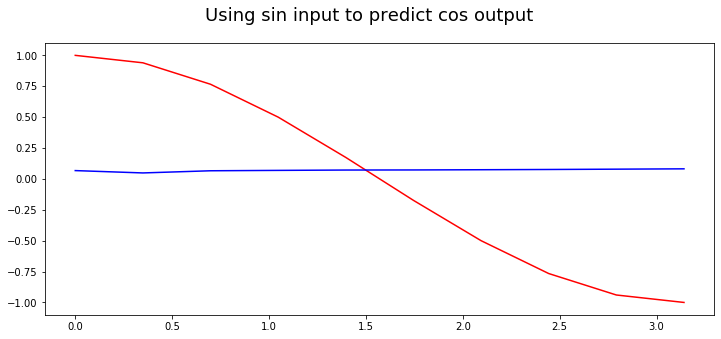

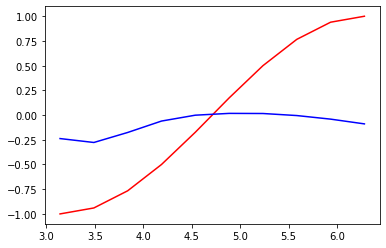

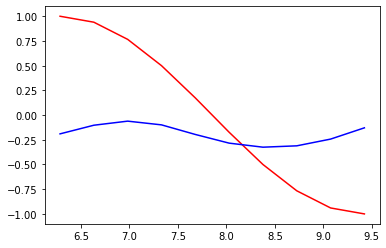

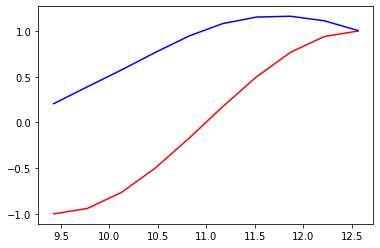

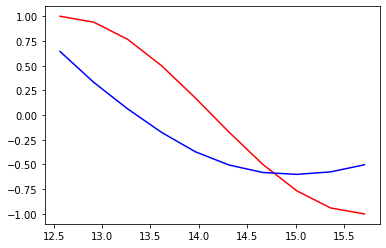

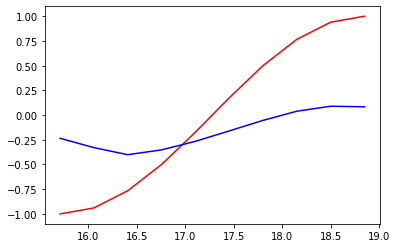

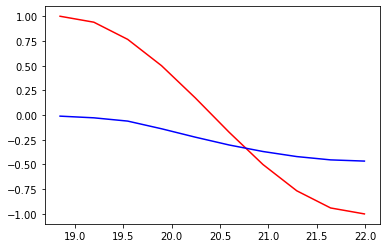

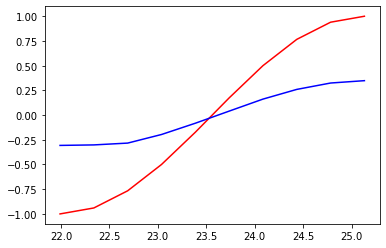

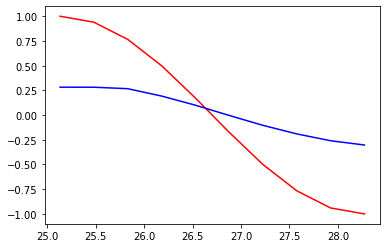

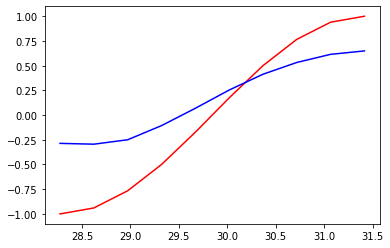

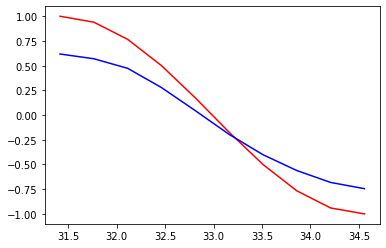

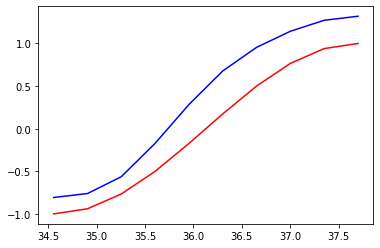

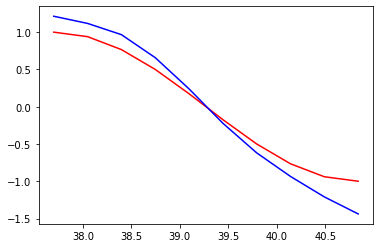

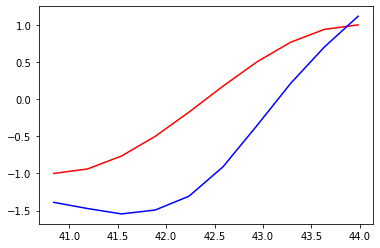

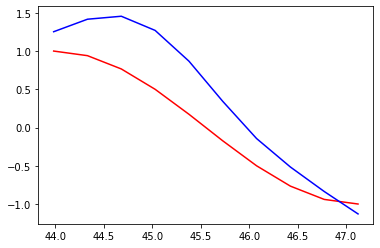

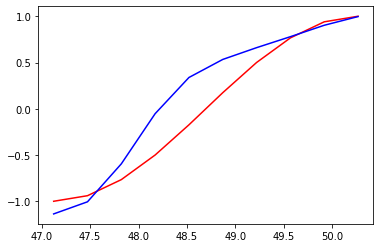

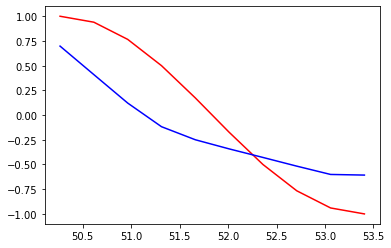

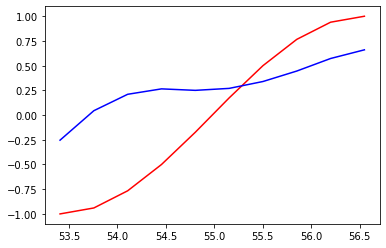

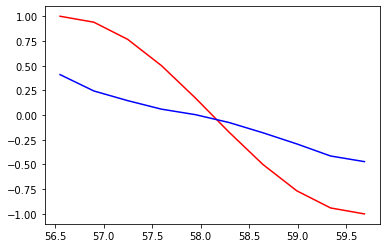

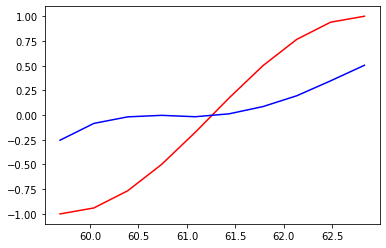

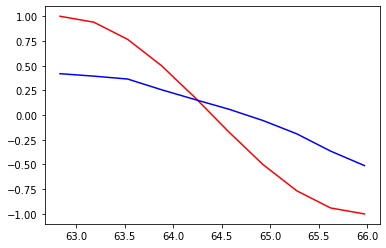

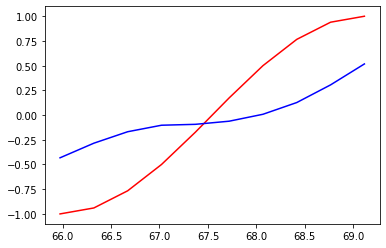

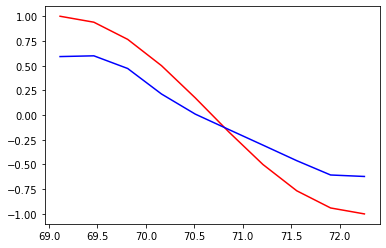

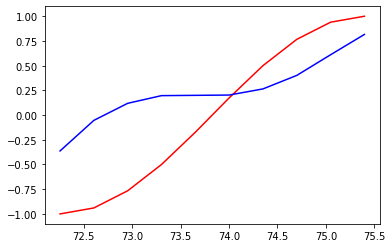

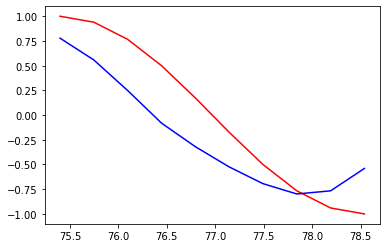

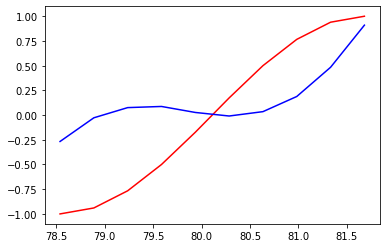

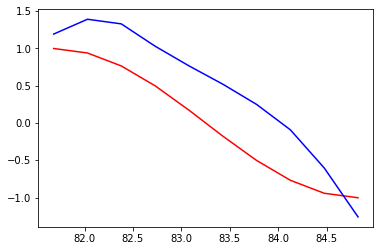

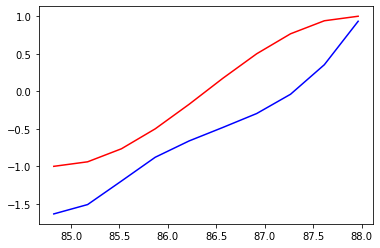

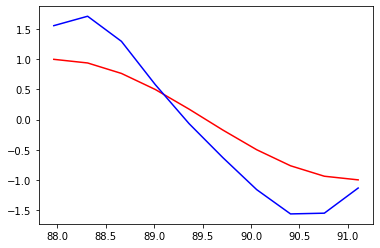

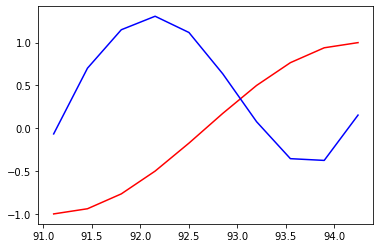

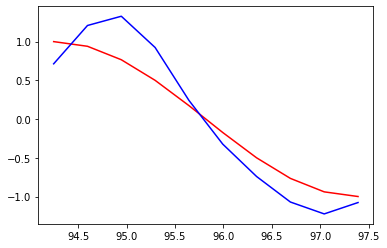

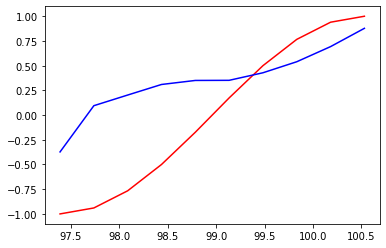

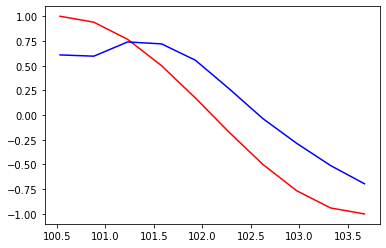

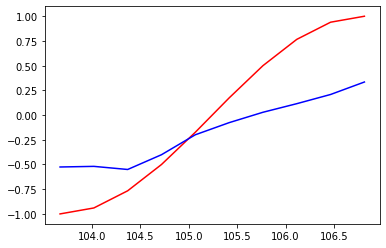

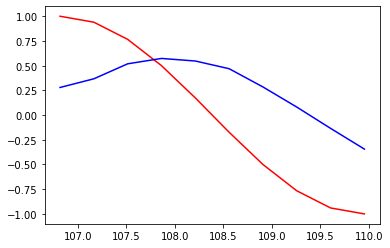

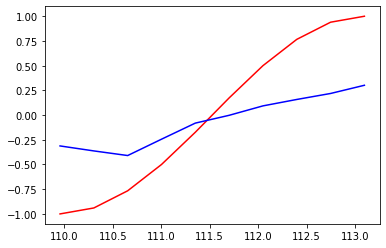

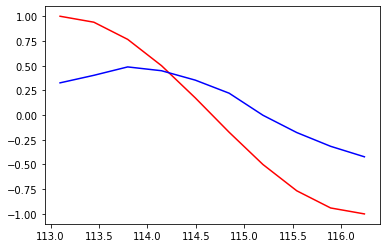

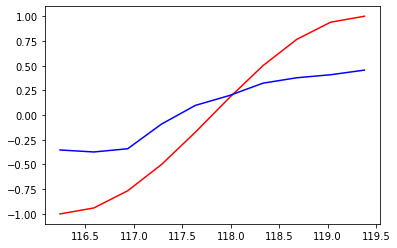

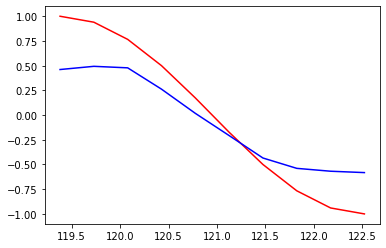

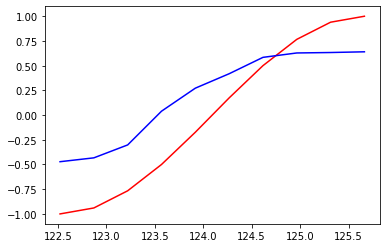

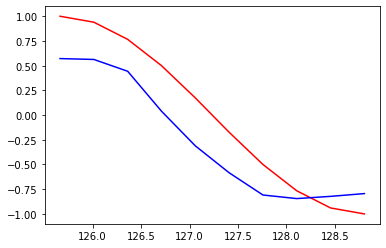

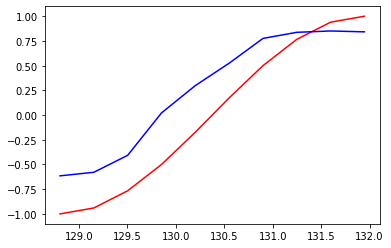

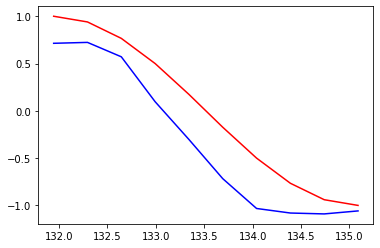

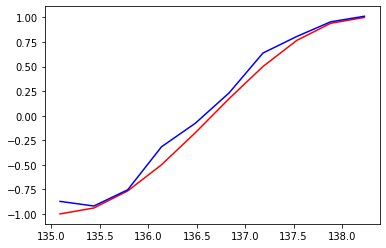

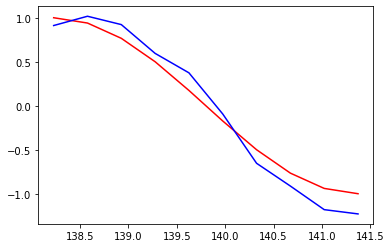

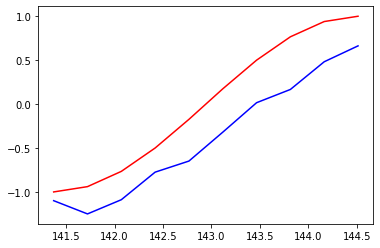

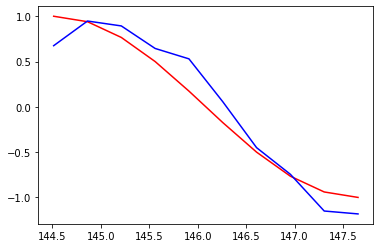

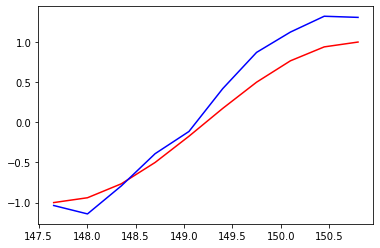

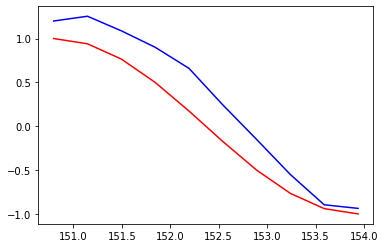

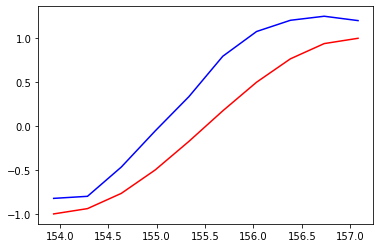

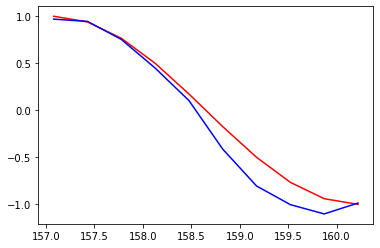

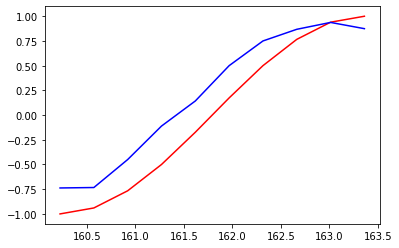

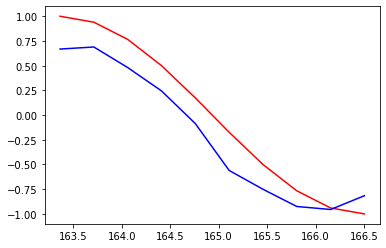

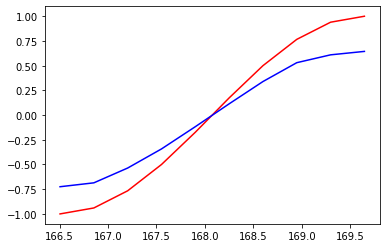

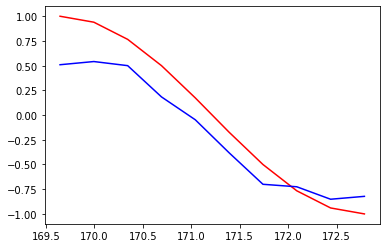

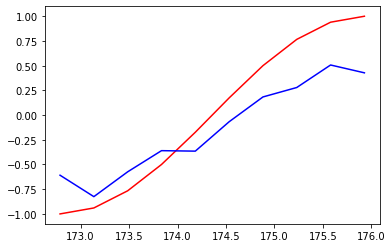

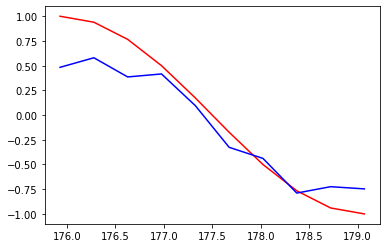

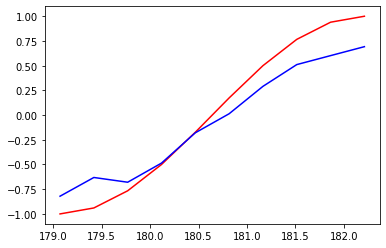

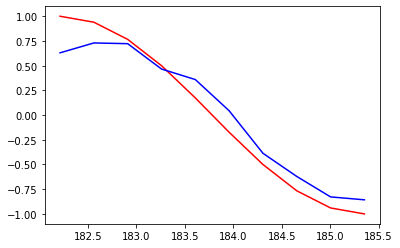

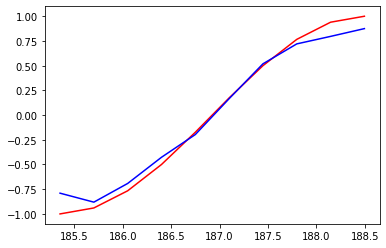

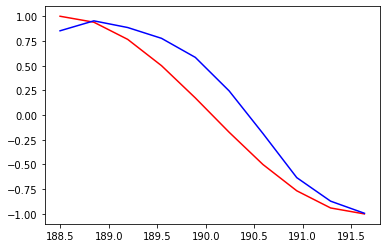

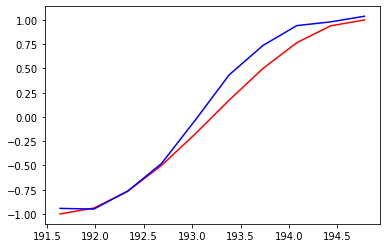

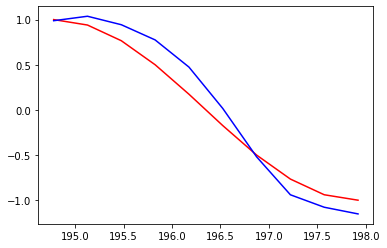

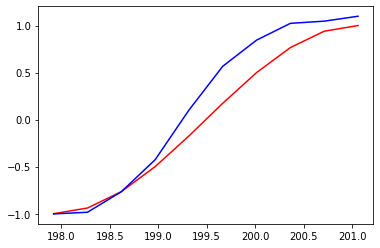

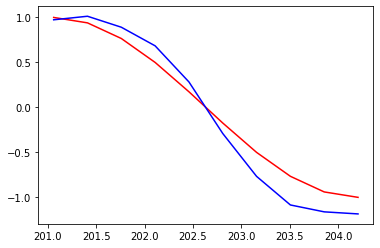

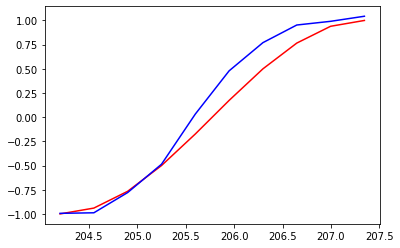

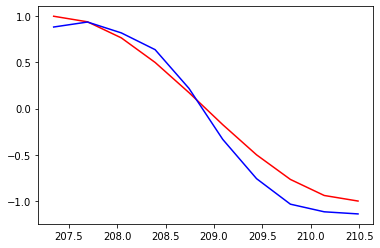

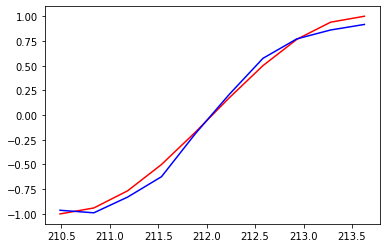

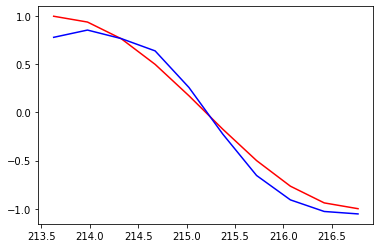

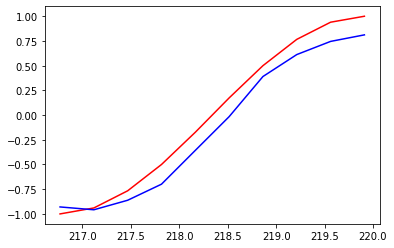

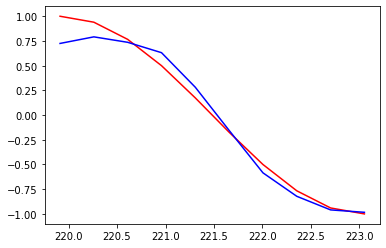

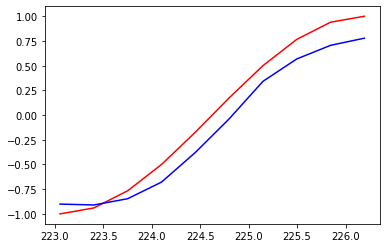

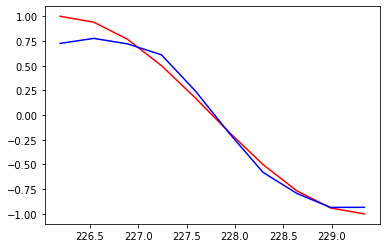

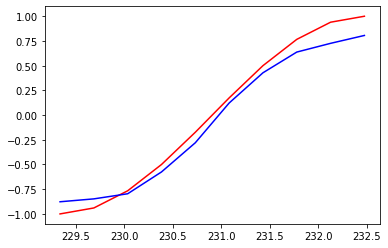

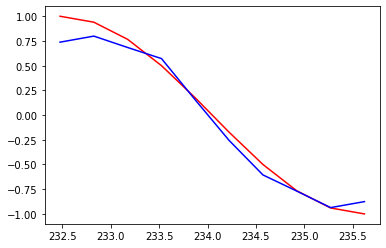

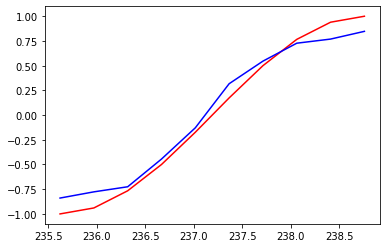

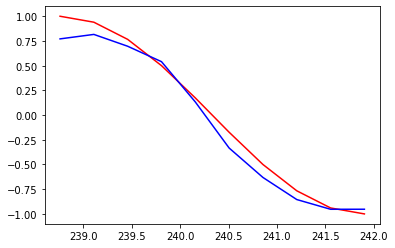

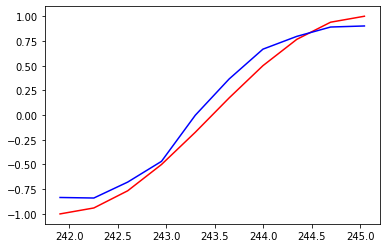

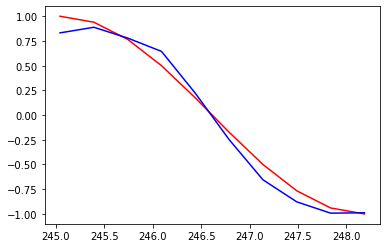

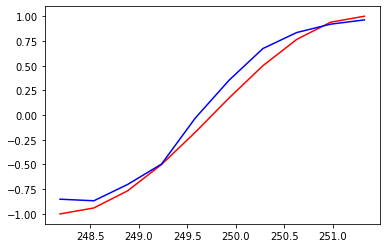

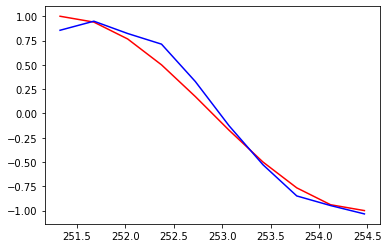

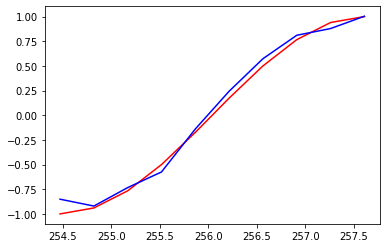

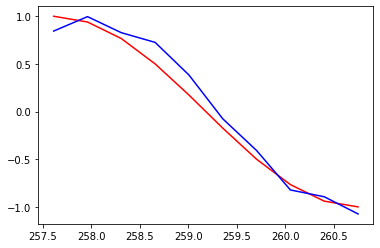

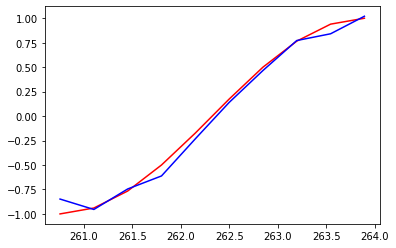

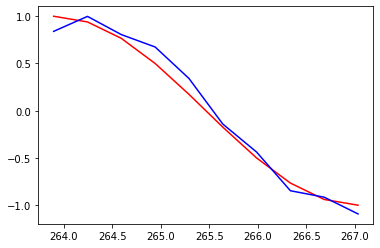

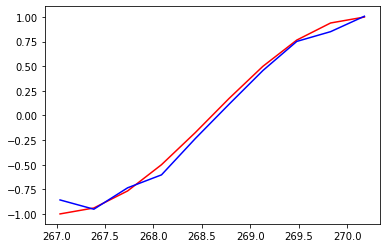

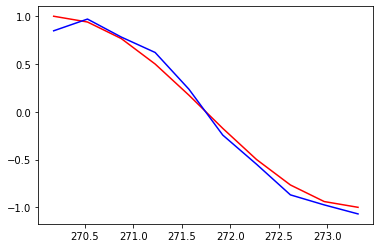

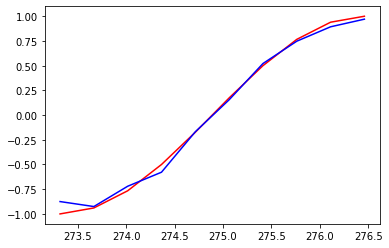

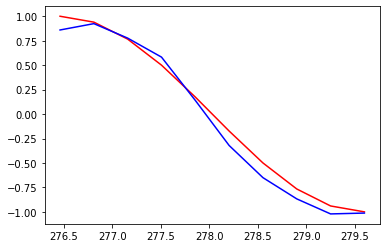

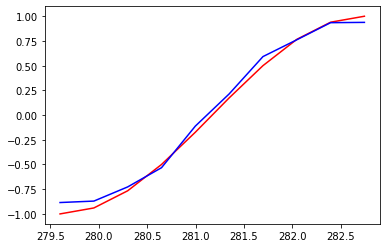

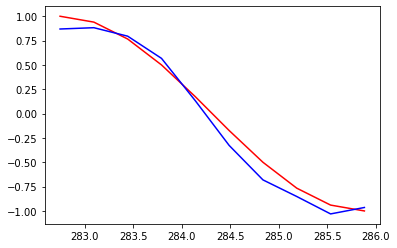

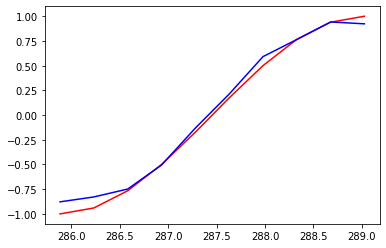

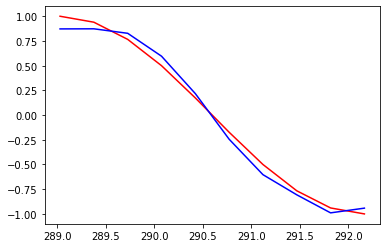

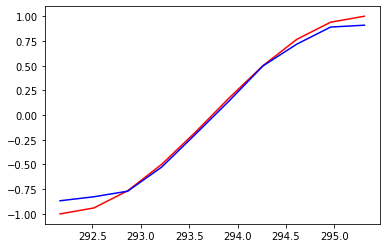

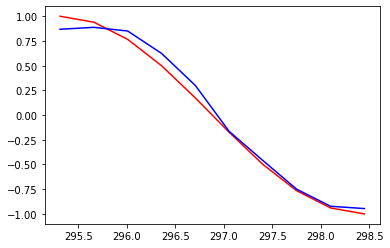

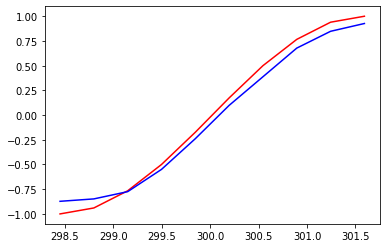

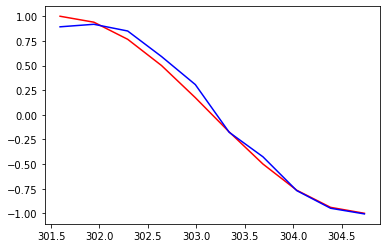

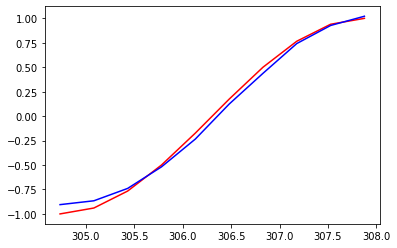

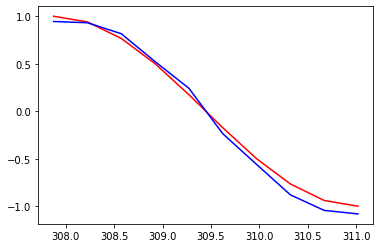

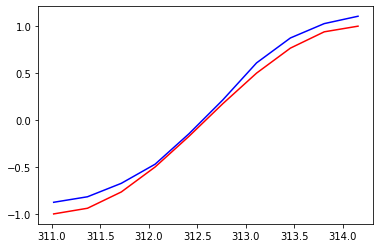

In [56]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR) # optimize all cnn parameters
loss_func = nn.MSELoss()
h_state = None # for initial hidden state
plt.figure(2, figsize=(12, 5))
plt.suptitle('Using sin input to predict cos output',fontsize='18')
plt.ion() 
for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps) 
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis]) # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    prediction, h_state = rnn(x, h_state) # rnn output
    h_state = h_state.data #break the connection from last iteration
    loss = loss_func(prediction, y) 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    plt.pause(0.1)
plt.ioff()
plt.show()

# ΚΥΡΙΟ ΜΕΡΟΣ (βήματα 9-14)


Παρακάτω είναι η έτοιμες συναρτήσεις που δόθηκαν με τις οποιες γίνονται το διάβασμα των αρχείων και εξαγωγή των mfccs καθώς και η οπτικοποίηση του confusion matrix.

In [1]:
import numpy as np
import librosa
from glob import glob
import os

from sklearn.preprocessing import StandardScaler

def parser(directory):
    # Parse relevant dataset info
    files = glob(os.path.join(directory, '*.wav'))
    fnames = [f.split('/')[5].split('.')[0].split('_') for f in files]  #analoga me to path allakse posa splits me / ginontai
    temp=[]
    for i in range(len(fnames)):
        fn=fnames[i][0].split('\\')[1]
        temp.append(fn)
    ids = [f[2] for f in fnames]
    y = [int(f) for f in temp]
    speakers = [f[1] for f in fnames]
    _, Fs = librosa.core.load(files[0], sr=None)

    def read_wav(f):
        global Fs
        wav, fs = librosa.core.load(f, sr=None)
        return wav

    # Read all wavs
    wavs = [read_wav(f) for f in files]

    # Extract MFCCs for all wavs
    window = 30 * Fs // 1000
    step = window // 2
    frames = [librosa.feature.mfcc(wav, Fs, n_fft=window, hop_length=window - step, n_mfcc=6).T for wav in wavs]
    # Print dataset info
    print('Total wavs: {}'.format(len(frames)))

    # Standardize data
    scaler = StandardScaler()
    scaler.fit(np.concatenate(frames))
    for i in range(len(frames)):
        frames[i] = scaler.transform(frames[i])

    # Split to train-test
    X_train, y_train, spk_train = [], [], []
    X_test, y_test, spk_test = [], [], []
    test_indices = ['0', '1', '2', '3', '4']
    for idx, frame, label, spk in zip(ids, frames, y, speakers):
        if str(idx) in test_indices:
            X_test.append(frame)
            y_test.append(label)
            spk_test.append(spk)
        else:
            X_train.append(frame)
            y_train.append(label)
            spk_train.append(spk)

    return X_train, X_test, y_train, y_test, spk_train, spk_test

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
X_train, X_test, y_train, y_test, spk_train, spk_test=parser("/Users/Giannis/Downloads/free-spoken-digit-dataset-master/recordings")

Total wavs: 2000


βήμα 9:

Χωρίζουμε τα train δεδομένα σε training και validation set με ποσοστό 80%-20%. Ενεργοποιούμε και την επιλογή stratified ώστε να διατηρηθεί ίδιος ο αριθμός των διαφορετικών ψηφίων σε κάθε set.

In [4]:
from sklearn.model_selection import train_test_split
x_training,x_val,y_training,y_val=train_test_split(X_train,y_train,test_size=0.2,stratify=y_train,random_state=2)
print(len(x_training))

1440


Βήμα 10:


Tώρα ο σκοπός μας είναι η αναγνώριση ψηφίων με GMM-HMM 

Αρχικοποιούμε ένα GMM-HMM μοντέλο για κάθε ψηφίο και όπως ζητείται το μοντέλο είναι της μορφής left –
right δηλαδη αν A={aij} είναι ο πίνακας μεταβάσεων του μοντέλου, τότε aij=0 για j<i , ενώ οι
αρχικές πιθανότητες των καταστάσεων είναι:

    π=   0 i≠1
         1 i=1
    
    
Μεταβάσεις επιτρέπονται μόνο μεταξύ διαδοχικών καταστάσεων το οποίο συνεπάγεται
aij=0 για j>i+1 .
Ένα διάνυσμα ακουστικών χαρακτηριστικών, όπως αυτό εξάγεται από την επεξεργασία ενός πλαισίου φωνής,
αποτελεί μια πιθανή παρατήρηση σε κάποια κατάσταση. Λόγω του ότι είναι επιτρεπτές συνεχείς μεταβολές
τέτοιων παρατηρήσεων, η πιθανότητα τους μοντελοποιείται με ένα μίγμα Γκαουσιανών κατανομών (filGMM).

Παρακάτω παρουσιάζεται η κλαση του κρυφου μαρκοβιανου μοντελου στη μορφη που μας δοθηκε.Λογω των περιορισμών μόνο δυο στοιχεία απο τη καθέ γραμμή το transition matrix ειναι μη μηδενικα και για να ικανοποιησουμε την ιδιοτητα του ως στοχαστικό πίνακα τα θεωρούμε αυθαίρετα 0.5 ετσι ώστε να αθροίζονται στη μονάδα.Η πυκνότητες πιθανότητας των observations του μοντέλου μοντελοποιούνται απο πεπερασμένο άθροισμα gaussian με παραμέτρους που υπολογίζονται απο τη μέθοδο from_samples

In [61]:
import numpy as np
from pomegranate import *
def hmm_digit_model(X,num_states,num_mixtures,gmm):
 

    dists = [] # list of probability distributions for the HMM states
    for i in range(n_states):
        if gmm:
            a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, num_mixtures, X.astype(float))
        else:
            a = MultivariateGaussianDistribution.from_samples(X)
        dists.append(a)

    trans_mat = np.zeros((n_states,n_states)) # your transition matrix
    for i in range(n_states-1):
        trans_mat[i][i]=0.5
        trans_mat[i][i+1]=0.5
  
    trans_mat[num_states-1][num_states-1]=1
    
  
    starts = np.zeros(num_states)
    starts[0]=1
  
    # your starting probability matrix
    ends = np.zeros(num_states) # your ending probability matrix
    ends[num_states-1]=1

    return trans_mat, dists, starts, ends

Εδώ οργανώνουμε τα δεδομένα μας ανα ψηφίο. Συγκεκριμένα ο πίνακας x_digits αποτελείται απο δέκα γραμμές όσα είναι και τα ψηφία και κάθε γραμμή περιέχει 2darrays με τα mfcc της κάθε εκφώνησης αυτού του ψηφίου.
Ο πινακάς X_dig έχει παρόμοια δομή με τη διαφορά οτι οι 2darrays στη καθε γραμμή που αντιστοιχεί σε ένα ψηφίο είναι συνενωμένοι στον αξονα τον χρονικών παραθύρων (αφου εχουν κοινο αριθμο mfcc features =6)

In [62]:
x_digits= [[] for i in range(10)]
X_dig=[[]]

for i in range(len(x_training)):
    x_digits[int(y_training[i])].append(x_training[i])


for i in range(10):
    a=np.concatenate((x_digits[i][0],x_digits[i][1]),axis=0)
    for j in range(1,144):
        a=np.concatenate((a,x_digits[i][j]),axis=0)
    X_dig.append(a)


del X_dig[0]

Εδω παρουσιάζεται η εκπαίδευση του κάθε μοντέλου και επιλογή καλύτερου ζευγους (num_mixtures,n_states)΄με τη λογική του gridsearch που βελτιστοποιεί την απόδοση του. Είναι λογικό κάθε GMM να εχει βελτιστη ακρίβεια για διαφορετικό αριθμό καταστάσεων και γκαουσιανων.Για κάθε μοντέλο που αντιστοιχεί σε διαφορετικό ψηφίο τρεχουμε δυο εμφολευμένες επαναληψεις με τις num_mixtures και n_states απο 2 μέχρι 5 και απο 2 μέχρι 4 αντίστοιχα.Καθε φορα δημιουργούμε ενα μοντέλο με αυτές τις δυο παραμέτρους και αφόυ εφαρμόσουμε fit το τεστάρουμε στο validation set και κραταμε την ακριβεια του σε ενα λεξικο της μορφης:
grid[(num_mixtures,n_states)]=accuracy. Αφου γέμισουμε το grid κρατάμε το ζεύγος που μας έδωσε τη μεγαλύτερη  ακριβεια.
Επαναλαμβάνουμε τη διαδίκασία και για τα μοντέλα των υπόλοιπων ψηφιών

In [63]:
from time import time 
start=time()
best_params=[]
for j in range(10): # for every model
    grid={}
    for num_mixtures in range(2,6):
        #print('num mixtures: ',num_mixtures)
        for n_states in range(2,5):
            #print('num states: ',n_states)
            # Define the GMM-HMM
        
            trans_mat, dists, starts, ends = hmm_digit_model(X_dig[j],n_states,num_mixtures,True)

            model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends)#, state_names=['s{}'.format(k) for k in range(n_states)])

            # Fit the model
            model.fit(x_digits[j], max_iterations=5)

            # Predict a sequence
            logp_list=[]
            for test in x_val:
            # a sample sequence
                logp,_ = model.viterbi(test) # Run viterbi algorithm and return log-probabilit
                logp_list.append(logp)
            m=np.mean(logp_list)
            
            #print('model',j,' ',m)
            grid[(num_mixtures,n_states)]=m
    best_params.append(max(grid, key=grid.get))
end=time()
t=end-start
print('time elapsed ',t)

time elapsed  296.15289855003357


Παρακάτω βλέπουμε μολις τελειώσει η διαδικασία της βελτιστοποίησης τα ζεύγη που αναφέρθηκαν παραπάνω και για τα οποία έχουν βελτιστη απόδοση τα μοντελα κατα σειρά απο το 0 μεχρι το 9

In [64]:
print(best_params)

[(5, 2), (2, 3), (2, 2), (3, 2), (5, 2), (2, 2), (5, 3), (5, 4), (4, 2), (2, 2)]


Με τα ζεύγη αυτά δημιουργούμε δέκα μοντέλα και τα κρατάμε σε μία λίστα

In [65]:
models=[]
for j in range(10):
    # Define the GMM-HMM
    _,n_s=best_params[j]
    n_m,_=best_params[j]
    trans_mat, dists, starts, ends = hmm_digit_model(X_dig[j],n_s,n_m,True)

    model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends)#, state_names=['s{}'.format(k) for k in range(n_states)])

    # Fit the model
    model.fit(x_digits[j], max_iterations=5)
    models.append(model)


τεστάρουμε το συνολο των μοντέλων στο test set όπως ζητείται.Η προβλεψη γίνεται κρατώντας το μοντέλο Που μας δίνει μέγιστο λογάριθμο πιθανοφάνειας μεσω αλγορίθμου viterbi

In [66]:
from sklearn.metrics import accuracy_score
y_pr_test=[]
for test in X_test:
    logp_list=[]
    for i in range(10):
        logp,_=models[i].viterbi(test)
        logp_list.append(logp)
    y_pr_test.append(logp_list.index(max(logp_list)))

print('accuracy over the test set ',accuracy_score(y_test,y_pr_test))

accuracy over the test set  0.97


Τεστάρουμε και ως προς το validation set το σύνολο των μοντέλων μας

In [67]:
y_pr_val=[]
for test in x_val:
    logp_list=[]
    for i in range(10):
        logp,_=models[i].viterbi(test)
        logp_list.append(logp)
    y_pr_val.append(logp_list.index(max(logp_list)))

print('accuracy over the validation set ',accuracy_score(y_val,y_pr_val))

accuracy over the validation set  0.9361111111111111


βήμα 13

Εμφανίζουμε τους ζητούμενους confussion matricies ενω τα ποσοστα του accuracy στο validation και στο test set φαίνονται παραπάνω.


test set confusion matrix
Confusion matrix, without normalization
[[20  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  1  0]
 [ 0  0  0 19  0  0  0  1  0  0]
 [ 0  1  0  0 19  0  0  0  0  0]
 [ 0  2  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  1  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0 20]]


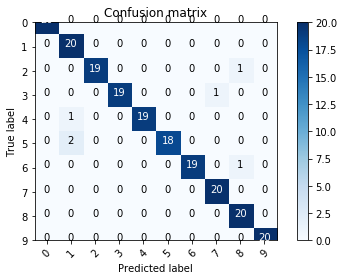

In [68]:
from sklearn.metrics import confusion_matrix
classes=[0,1,2,3,4,5,6,7,8,9]
c1=confusion_matrix(y_test,y_pr_test)
print('test set confusion matrix')
plot_confusion_matrix(c1,classes)

validation set confusion matrix
Confusion matrix, without normalization
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  1  0  0  1  0  0]
 [ 2  0  1 28  0  0  0  5  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  7  0  0  0 28  0  1  0  0]
 [ 0  0  0  1  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  0 36  0]
 [ 0  1  0  0  0  0  0  2  0 33]]


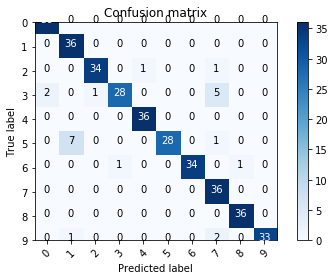

In [69]:
print('validation set confusion matrix')
c2=confusion_matrix(y_val,y_pr_val)
plot_confusion_matrix(c2,classes)

# Βημα 14

Στο βήμα αυτό θα δημιουργήσουμε ενα αναδρομικό νευρωνικό δικτυο που έχει ώς στοχο να αποτελεί ένα βασικό σύστημα αναγνώρισης φωνής. Στηριζόμαστε στο LSTM κύτταρο το οποίο έχει τη δυνατότητα να χειρίζεται long term dependencies.Η γενικη high level δομή του LSTM κυττάρου φαίνεται στην παρακάτω εικόνα
<img src="Lstm_function.png">

Κατακόρυφα είναι τα διαφορετικά επίπεδα (num_layers) ενω τα Xi δηλώνουν την ακολουθία που παιρνάει απο το νευρωνικό τη χρονικη στιγμή i

Παρακάτω παρουσιάζουμε την κλάση framedleveldataset η οποία τροποποιήθηκε ώστε να δέχεται άλλη μια παράμετρο m ως όρισμα η οποία είναι το μέγιστο μήκος ακολουθίας συνολικά απο training validation και test set.Με βάση αυτη τη παράμετρο πραγματοποιούμε zero padding ετσι ώστε πρακτικά όλες οι εκφωνήσεις να έχουν τον ίδιο αριθμό απο frames.Η κυρια λειτουργεια αυτης της κλασης ειναι να δημιουργει dataset objects με τρια πεδια: feats,lengths,labels

In [5]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn


class FrameLevelDataset(Dataset):
    def __init__(self, feats, labels,m):
        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """
        self.lengths =  [len(i) for i in feats]# Find the lengths 

        self.feats = self.zero_pad_and_stack(feats,m)
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(labels).astype('int64')

    def zero_pad_and_stack(self, x,m):
        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape num_sequences x max_sequence_length x feature_dimension
        """
        padded=[]
        ref_shape=(m,6)
        for p in x:
            pad=np.zeros(ref_shape)
            pad[:p.shape[0],:p.shape[1]] = p
            padded.append(pad)
            
        padded = np.array(padded)
      

        return padded

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)

Εδω συμπληρωνουμε τη κλάση LSTM που μας δόθηκε. Στη μέθοδο init καναμε όλες τις αρχικοποιήσεις με:

input_dim= το μηκος των χαρακτηριστικών κάθε ακολουθίας (σε εμας ειναι 6)

rnn_size= το μεγεθως των κρυφων νευρωνων του lstm το οποίο το ορίσαμε αυθαίρετα.
Η μεταβλητη αυτή τίθεται αυτουσια στο feature_size αν δεν εχουμε bidirectional δίκτυο αλλιώς διπλασιάζεται.

output_dim= η διασταση της εξόδου σε αντιστοιχια με το πλήθως των labels.Σε αυτη την εφαρμογή είναι δέκα

num_layers= το πλήθος των επιπέδων του lstm

αξίζει να σημειωθεί και οτι ορίσαμε ενα fc linear module απο τη κλαση nn.module και μετατρεπει τους τελευταίους κρυφους νευρώνες στο επιθυμητό output_dim

Η forward συμπληρώθκε ώστε απλά να παιρνάει μέσα απο το  cell την ακολουθία εκείνου του time step και το hidden του προηγούμενου βήματος. Η έξοδος για κάθε time step είναι ενα out και ενα νεο hidden.απο τα out συνολικά θέλουμε μόνο το τελευταίο οπότε χρησιμοποιούμε τη συνάρτηση που μας δόθηκε.

In [6]:
class BasicLSTM(nn.Module):
    def __init__(self, input_dim, rnn_size, output_dim, num_layers, bidirectional):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.num_layers=num_layers
        self.feature_size=rnn_size*2 if self.bidirectional else rnn_size
        self.lstm = nn.LSTM(input_dim, hidden_size=self.feature_size, num_layers=num_layers,bidirectional=self.bidirectional,dropout=0.3, batch_first=True)
        self.fc=nn.Linear(self.feature_size,output_dim)

    def forward(self, x, lengths):
        
        self.h = torch.zeros(self.num_layers, x.size(0), self.feature_size).requires_grad_() 
        self.c = torch.zeros(self.num_layers, x.size(0), self.feature_size).requires_grad_()
        self.hidden=(self.h,self.c)
        out, self.hidden = self.lstm(x, (self.h.detach(),self.c.detach()))
        
        last_out=self.last_timestep(out,lengths,self.bidirectional)
        last_outputs=self.fc(last_out)
        
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index

            lengths: N x 1
         """
        
        return last_outputs

    def last_timestep(self, outputs, lengths, bidirectional):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

Βρισκουμε το μεγιστο μήκος ακολουθίας ώστε να το περάσουμε στη frameleveldataset

In [7]:
#find max sequence len
X=X_train+X_test
m=-1
for i in X:
    l,_=np.shape(i)
    if l>m:
        m=l
print(m)

153


Εδώ δημιουργούμε το dataset μας. Για training ,validation και test set αφώτου δημιουργηθουν τα αντίστοιχα αντικείμενα απο τη frameleveldataset τα παιρναμε μεσα απο dataloader ωστε να χωριστουν σε batches και να ειναι σε μορφή 3d tensor Που δέχεται το νευρωνικό.Επιλέξαμε αυθαίρετα batch_size=100

In [8]:
framed_training=FrameLevelDataset(x_training,y_training,m)
framed_val=FrameLevelDataset(x_val,y_val,m)
framed_test=FrameLevelDataset(X_test,y_test,m)
batch_size=100
data_test=torch.utils.data.DataLoader(framed_test, batch_size=batch_size, shuffle=False)
data_training=torch.utils.data.DataLoader(framed_training, batch_size=batch_size, shuffle=False)
data_val=torch.utils.data.DataLoader(framed_val, batch_size=batch_size, shuffle=False)

Ορίζουμε όλες τις παραμέτρους του νευρωνικού.

In [9]:
input_dim=6
batch_size=100
num_layers=3
rnn_size=12
output_dim=10
n_iters = 1000
num_epochs = n_iters / (len(data_training) / batch_size)
num_epochs = int(num_epochs)
#num_epochs = 10

Oρίζουμε το μοντέλο και τις παραμέτρους μάθησης του.Εχουμε προσθέσει dropout=0.3 όταν ορίσαμε το lstm μεσα στη κλάση basicLSTM και εκφραζει πιθανότητα αποκοπής του τελευταίου layer βοηθώντας ετσι να αποφεύγουμε με καποιο τρόπο την υπερεκπαίδευση. Το L2 regurarization ορίζεται απο την παράμετρο weight_decay στον SGD optimizer οπως φαίνεται παρακάτω.Παρατηρήσαμε όμως οτι η προσθήκη του δέν βοηθάει αλλα αντίθετα μειώνει το accuracy οπότε το αγνοήσαμε ως μηδέν.Πρακτικά αυτο το weight_decay προσθέτει ένα πεναλτυ στον optimizer και να ελεγχει τις αλλαγές στο μοντέλο και τη πολυπλοκότητα του βοηθώντας έτσι στη καλύτερη πρόβλεψη.Για Bidirectional μοντέλο απλα παιρναμε ως τελευταία μεταβλητή στο μοντέλο το True

In [10]:
model = BasicLSTM(input_dim, rnn_size, output_dim, num_layers,False)

num_epochs=200
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,weight_decay=0)  
seq_dim = m

In [11]:
iter = 0
tr_loss=[]
val_l=[]
for epoch in range(num_epochs):
    print('epoch: ',epoch)
    for i, (digits, labels,lengths) in enumerate(data_training):
        digits = digits.view(-1, seq_dim, input_dim).requires_grad_()
        # Clear gradients w.r.t. parametrs
        optimizer.zero_grad()

        # Forward pass to get output
        outputs = model(digits.float(),lengths)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        tr_loss.append(loss)
        # Getting gradients w.r.t. parameter
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
    # Calculate Accuracy         
    correct = 0
    total = 0
    # Iterate through test dataset
    for digits, labels,lengths in data_val:


        digits = digits.view(-1, seq_dim, input_dim).requires_grad_()

        # Forward pass only to get logits/output
        outputs = model(digits.float(),lengths)
        val_loss=criterion(outputs,labels)
        val_l.append(val_loss)
        val_loss.backward()
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy = 100 * correct / total

    print('Iteration: {}. validation loss: {} Loss: {}. Accuracy: {}'.format(iter, loss.item(),val_loss,accuracy))

epoch:  0
Iteration: 15. validation loss: 2.3236165046691895 Loss: 2.311889410018921. Accuracy: 10
epoch:  1
Iteration: 30. validation loss: 2.314450979232788 Loss: 2.3097314834594727. Accuracy: 10
epoch:  2
Iteration: 45. validation loss: 2.310987949371338 Loss: 2.3062140941619873. Accuracy: 10
epoch:  3
Iteration: 60. validation loss: 2.3073604106903076 Loss: 2.305307149887085. Accuracy: 10
epoch:  4
Iteration: 75. validation loss: 2.3069074153900146 Loss: 2.3046693801879883. Accuracy: 10
epoch:  5
Iteration: 90. validation loss: 2.3020830154418945 Loss: 2.304867744445801. Accuracy: 10
epoch:  6
Iteration: 105. validation loss: 2.301764488220215 Loss: 2.30350399017334. Accuracy: 9
epoch:  7
Iteration: 120. validation loss: 2.3025267124176025 Loss: 2.302295207977295. Accuracy: 14
epoch:  8
Iteration: 135. validation loss: 2.2985620498657227 Loss: 2.3032805919647217. Accuracy: 13
epoch:  9
Iteration: 150. validation loss: 2.2965760231018066 Loss: 2.303173303604126. Accuracy: 10
epoch: 

Iteration: 1215. validation loss: 0.565635621547699 Loss: 0.8462972640991211. Accuracy: 75
epoch:  81
Iteration: 1230. validation loss: 0.6111034750938416 Loss: 0.8968459367752075. Accuracy: 75
epoch:  82
Iteration: 1245. validation loss: 0.5529662370681763 Loss: 0.9092987179756165. Accuracy: 74
epoch:  83
Iteration: 1260. validation loss: 0.6228676438331604 Loss: 0.8931668996810913. Accuracy: 76
epoch:  84
Iteration: 1275. validation loss: 0.9903038144111633 Loss: 0.8678420186042786. Accuracy: 68
epoch:  85
Iteration: 1290. validation loss: 0.6827557682991028 Loss: 0.7663504481315613. Accuracy: 76
epoch:  86
Iteration: 1305. validation loss: 0.6932111978530884 Loss: 0.7181566953659058. Accuracy: 78
epoch:  87
Iteration: 1320. validation loss: 0.6082833409309387 Loss: 0.7823395133018494. Accuracy: 77
epoch:  88
Iteration: 1335. validation loss: 0.5465906262397766 Loss: 0.7233841419219971. Accuracy: 77
epoch:  89
Iteration: 1350. validation loss: 0.5330191850662231 Loss: 0.6658486723899

Iteration: 2385. validation loss: 0.13663293421268463 Loss: 0.2551979720592499. Accuracy: 92
epoch:  159
Iteration: 2400. validation loss: 0.17642155289649963 Loss: 0.30847635865211487. Accuracy: 91
epoch:  160
Iteration: 2415. validation loss: 0.1803625524044037 Loss: 0.34873995184898376. Accuracy: 91
epoch:  161
Iteration: 2430. validation loss: 0.16003520786762238 Loss: 0.317322701215744. Accuracy: 91
epoch:  162
Iteration: 2445. validation loss: 0.17101389169692993 Loss: 0.31216153502464294. Accuracy: 90
epoch:  163
Iteration: 2460. validation loss: 0.18681660294532776 Loss: 0.4227657616138458. Accuracy: 91
epoch:  164
Iteration: 2475. validation loss: 0.1595664918422699 Loss: 0.5119431018829346. Accuracy: 91
epoch:  165
Iteration: 2490. validation loss: 0.15582121908664703 Loss: 0.32065027952194214. Accuracy: 93
epoch:  166
Iteration: 2505. validation loss: 0.12294274568557739 Loss: 0.3991403877735138. Accuracy: 91
epoch:  167
Iteration: 2520. validation loss: 0.2148277312517166 L

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2937600 bytes. Buy new RAM!


In [12]:
correct_val=0
total_val=0
b=1
y_pr_val=[]
for digits,labels,lengths in data_val:
    digits = digits.view(-1, seq_dim, input_dim).requires_grad_()
    outputs = model(digits.float(),lengths)
    #predictions from the maximum value
    _, predicted = torch.max(outputs.data, 1)
    y_pr_val.append(predicted)
    total_val += labels.size(0)
    # Total correct predictions
    correct_val += (predicted == labels).sum()
    accuracy = 100 * correct_val / total_val
    # Print Loss
    print(' Accuracy: {} for {} val_batch'.format( accuracy,b))
    b+=1
print(y_pr_val)

 Accuracy: 95 for 1 val_batch
 Accuracy: 94 for 2 val_batch
 Accuracy: 92 for 3 val_batch
 Accuracy: 92 for 4 val_batch
[tensor([1, 4, 3, 4, 6, 3, 4, 5, 6, 7, 3, 2, 4, 2, 3, 3, 9, 0, 8, 3, 4, 2, 2, 8,
        1, 8, 5, 7, 2, 1, 0, 3, 4, 4, 3, 0, 3, 8, 3, 1, 6, 1, 9, 7, 9, 0, 3, 7,
        1, 6, 2, 8, 6, 5, 8, 6, 9, 6, 2, 1, 2, 1, 6, 9, 8, 9, 3, 9, 6, 1, 1, 2,
        9, 8, 4, 2, 5, 0, 8, 4, 5, 5, 9, 7, 4, 6, 5, 7, 1, 2, 0, 9, 4, 7, 9, 3,
        0, 4, 8, 0]), tensor([2, 3, 3, 8, 8, 4, 9, 4, 9, 9, 2, 8, 1, 7, 1, 7, 2, 1, 1, 6, 8, 3, 5, 7,
        6, 7, 8, 9, 0, 9, 4, 0, 9, 0, 2, 0, 9, 5, 9, 9, 2, 2, 7, 3, 7, 3, 5, 7,
        0, 1, 6, 0, 7, 8, 8, 3, 7, 8, 2, 8, 8, 1, 1, 2, 2, 7, 4, 9, 8, 9, 1, 1,
        0, 5, 3, 5, 9, 6, 4, 1, 6, 1, 4, 7, 8, 8, 5, 5, 7, 5, 7, 9, 7, 1, 0, 3,
        6, 3, 1, 5]), tensor([4, 2, 4, 0, 5, 7, 8, 8, 8, 4, 8, 8, 0, 7, 5, 4, 7, 7, 8, 5, 3, 0, 7, 4,
        8, 5, 6, 7, 0, 0, 0, 3, 2, 8, 0, 6, 4, 8, 6, 1, 3, 9, 8, 1, 7, 1, 7, 5,
        9, 0, 0, 4, 3, 8, 5, 6, 6, 

In [13]:
correct_test=0
total_test=0
b=1
y_pr_test=[]

for dig, lab,leng in data_test:
    dig = dig.view(-1, seq_dim, input_dim).requires_grad_()
    outputs = model(dig.float(),leng)
    #predictions from the maximum value
    _, predicted = torch.max(outputs.data, 1)
    y_pr_test.append(predicted)
    total_test += lab.size(0)
    # Total correct predictions
    correct_test += (predicted == lab).sum()
    accuracy = 100 * correct_test / total_test
    # Print Loss
    print(' Accuracy: {} for {} test_batch'.format( accuracy,b))
    b+=1

 Accuracy: 92 for 1 test_batch
 Accuracy: 87 for 2 test_batch
